# **Food Image Classification**

----------------------------------------------------------------------
## **Context:**
-------------------------------------------------------------------------------
Image classification has become less complicated with deep learning and the availability of larger datasets and computational assets. The Convolution neural network is the most popular and extensively used image classification technique in the latest day.

Clicks is a stock photography company and is an online source of images available for people and companies to download. Photographers from all over the world upload food-related images to the stock photography agency every day. Since the volume of the images that get uploaded daily will be high, it will be difficult for anyone to label the images manually.

--------------------------------------------------------------------------------
## **Objective:**
--------------------------------------------------------------------------------
Clicks have decided to use only three categories of food (**Bread**, **Soup**, and  **Vegetables-Fruits**) for now, and you as a data scientist at Clicks, need to build a classification model using a dataset consisting of images that would help to label the images into different categories.

-----------------------------------------------------------------------------
## **Dataset:**
----------------------------------------------------------------------------
The dataset folder contains different food images. The images are already split into Training and Testing folders.
Each folder has  four subfolders named **`Bread`**, **`Soup`**, and  **`Vegetables-Fruits`**. These folders have images of the respective classes.

## **Mount the Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import cv2
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model # Sequential API for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report, confusion_matrix

## **Importing the Dataset**


In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Food_Data.zip'
# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

## **Preparing the Data**

The dataset has two folders, i.e., 'Training' and 'Testing'. Each of these folders has three sub-folders, namely 'Bread', 'Soup', and 'Vegetable-Fruit'. We will have the Training and Testing path stored in a variable named 'DATADIR'. The names of the sub-folders, which will be the classes for our classification task will be stored in an array called 'CATEGORIES'.

### **Training Data**

We will convert each image into arrays and store them in an array called 'training_data' along with their class index.

In [ ]:
# Storing the training path in a variable named DATADIR, and storing the unique categories/labels in a list
DATADIR = "/content/Food_Data/Training"                                        # Path of training data after unzipping
CATEGORIES = ["Bread", "Soup", "Vegetable-Fruit"]                              # Storing all the categories in 'CATEGORIES' variable
IMG_SIZE = 150                                                                 # Defining the size of the image to 150

In [ ]:
# Here we will be using a user defined function create_training_data() to extract the images from the directory
training_data = []
# Storing all the training images
def create_training_data():
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(DATADIR, category)                                 # Joining images with labels
        class_num = category
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))                    # Reading the data
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))            # Resizing the images
            training_data.append([new_array, class_num])                       # Appending both the images and labels
create_training_data()

array([[[ 62,  59,  61],
        [ 57,  60,  57],
        [ 52,  56,  51],
        ...,
        [ 16,  10,  15],
        [ 15,   8,  13],
        [ 15,   7,  14]],

       [[ 58,  50,  53],
        [ 61,  57,  57],
        [ 52,  49,  48],
        ...,
        [ 16,  10,  16],
        [ 15,   7,  15],
        [ 17,   8,  18]],

       [[ 62,  55,  59],
        [ 52,  46,  47],
        [ 59,  57,  57],
        ...,
        [ 15,   7,  17],
        [ 16,   6,  18],
        [ 17,   7,  19]],

       ...,

       [[ 70,  89, 102],
        [ 64,  82,  93],
        [ 57,  73,  89],
        ...,
        [139, 170, 173],
        [138, 173, 176],
        [144, 171, 177]],

       [[102, 127, 134],
        [ 73,  94, 101],
        [ 62,  78,  91],
        ...,
        [144, 175, 179],
        [143, 178, 182],
        [147, 173, 182]],

       [[115, 143, 144],
        [ 93, 116, 119],
        [ 64,  80,  92],
        ...,
        [146, 176, 181],
        [143, 178, 184],
        [146, 170, 182]]], dtype=uint8)
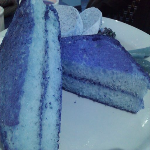

In [ ]:
training_data[1][0]

In [ ]:
training_data[1][0].shape

(150, 150, 3)

### **Testing Data**

We will do the same operation with our Testing data. We will convert each images into arrays and then append them to our array named 'testing_data' along with their class indexes.

In [ ]:
DATADIR_test = "/content/Food_Data/Testing"                                    # Path of training data after unzipping
CATEGORIES =  ["Bread", "Soup", "Vegetable-Fruit"]                             # Storing all the categories in categories variable
IMG_SIZE = 150                                                                 # Defining the size of the image to 150

In [ ]:
# Here we will be using a user defined function create_testing_data() to extract the images from the directory
testing_data = []
# Storing all the testing images
def create_testing_data():
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(DATADIR_test, category)                            # Joining images with labels
        class_num = category
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))                    # Reading the data
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))            # Resizing the images
            testing_data.append([new_array, class_num])                        # Appending both the images and labels
create_testing_data()

## **Visualizing images randomly from each class**

-----------------------------------------------------------------------------------------
### **Bread**
------------------------------------------------------------------------------------

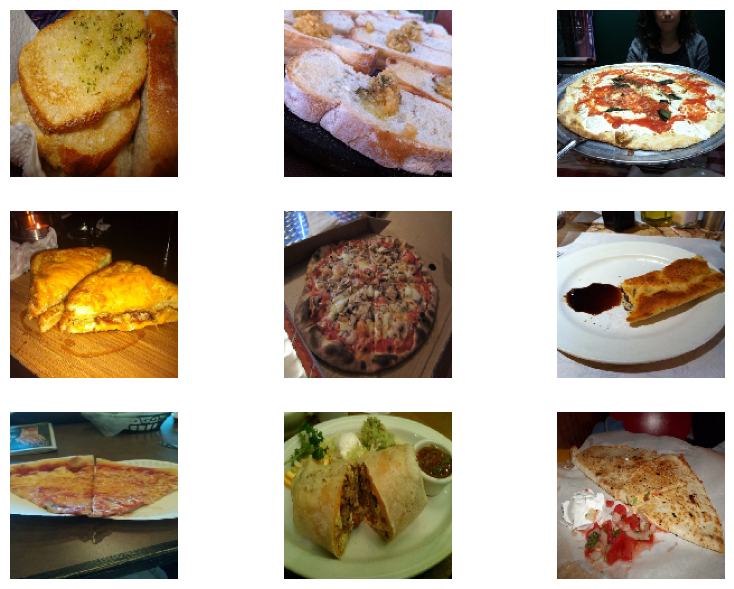

In [ ]:
#select 9 random images to show
bread_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[0]}') ]
select_bread = np.random.choice(bread_imgs, 9, replace = False)
fig = plt.figure(figsize = (10, 10)) # set the image size 10 by 10
for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)
    fp = f'{DATADIR}/{CATEGORIES[0]}/{select_bread[i]}'
    fn = load_img(fp, target_size = (150, 150))
    plt.imshow(fn, cmap = 'Greys_r')
    plt.axis('off')

**Observations:**

* Most bread items have a round, oval or elliptical shape, except for sandwiches.

* Almost all bread items have a grilled or charred portion, which can be an easily recognizable feature to our Neural Network.

------------------------------------------------------------------------------------------------
### **Soup**
-------------------------------------------------------------------------------------

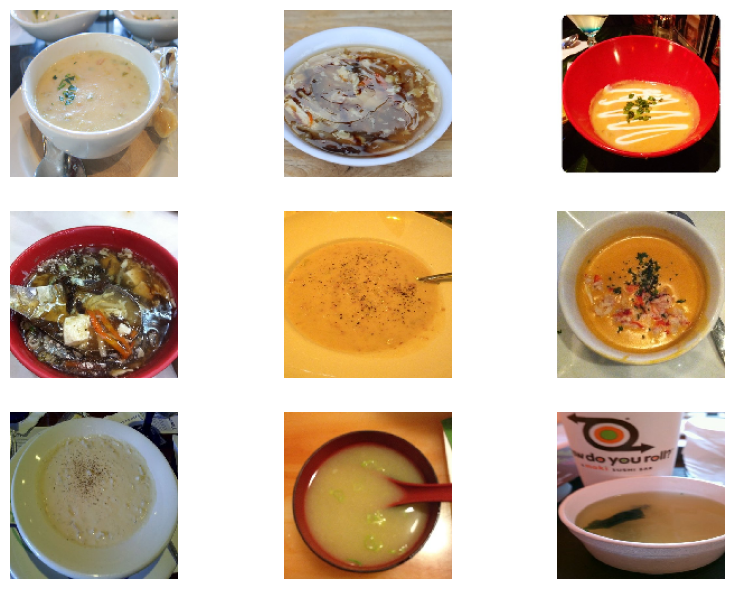

In [ ]:
soup_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[1]}') ]
select_soup = np.random.choice(soup_imgs, 9, replace = False)
fig = plt.figure(figsize = (10, 10))
for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)
    fp = f'{DATADIR}/{CATEGORIES[1]}/{select_soup[i]}' # catogery 1 is soup
    fn = load_img(fp, target_size = (150, 150))
    plt.imshow(fn, cmap = 'Greys_r')
    plt.axis('off')
plt.show()

**Observations:**

* All Soup images are defined by a liquid taking on the shape of the container or utensil it is kept in.

* There is a distinct glare from the reflection of light on most of the images.

* Also, almost all of these images have a utensil, which can be a feature that confuses the model between bread and soup. As, images from both the classes mostly contain a dish or a bowl, where they are placed.

-------------------------------------------------------------------------------------------------------
### **Vegetable-Fruit**
--------------------------------------------------------------------------------------

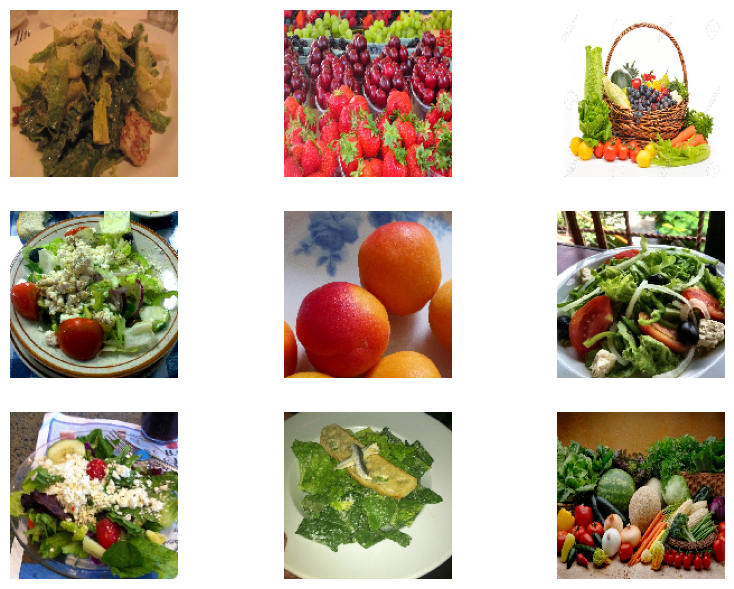

In [ ]:
vegetable_fruit_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[2]}') ]
select_vegetable_fruit = np.random.choice(vegetable_fruit_imgs, 9, replace = False)
fig = plt.figure(figsize = (10, 10))
for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)
    fp = f'{DATADIR}/{CATEGORIES[2]}/{select_vegetable_fruit[i]}'
    fn = load_img(fp, target_size = (150, 150))
    plt.imshow(fn, cmap = 'Greys_r')
    plt.axis('off')
plt.show()

**Observation:**

* Most of the images in these classes have vibrant colors and a repeating shape throughout the image.



### **Data Preprocessing**

The arrays training_data and testing_data had the images stored as arrays with their corresponding labels as the class indexes. So in essence, our training_data and testing_data were arrays of tuples, where each tuple contained the image and its label.

In the following cells, we will unpack the tuples. We will shuffle our training_data and testing_data, and store the images in X_train, and X_test, and the labels in y_train, and y_test respectively.

In [ ]:
X_train = []
y_train = []
np.random.shuffle(training_data)                                               # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in training_data:                                     # Iterating over the training data which is generated from the create_training_data() function
   X_train.append(features)                                                   # Appending images into X_train
   y_train.append(label)                                                      # Appending labels into y_train

In [ ]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_test = []
y_test = []
np.random.shuffle(testing_data)                                                # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in testing_data:                                           # Iterating over the training data which is generated from the create_testing_data() function
   X_test.append(features)                                                    # Appending images into X_test
   y_test.append(label)                                                       # Appending labels into y_test

In [ ]:
# Converting the pixel values into Numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape

(3203, 150, 150, 3)

**Note:** Images are digitally represented in the form of NumPy arrays which can be observed from the X_train values generated above, so it is possible to perform all the preprocessing operations and build our CNN model using NumPy arrays directly. So, even if the data is provided in the form of NumPy arrays rather than images, we can use this to work on our model.

In [ ]:
# Converting the lists into DataFrames
y_train = pd.DataFrame(y_train, columns = ["Label"], dtype = object)
y_test = pd.DataFrame(y_test, columns = ["Label"], dtype = object)

Since the given data is stored in variables X_train, X_test, y_train, and y_test, there is no need to split the data further.

## **Checking Distribution of Classes**

In [ ]:
# Printing the value counts of target variable
count = y_train.Label.value_counts()
print(count)
print('*'*10)
count = y_train.Label.value_counts(normalize = True)
print(count)

Label
Soup               1500
Bread               994
Vegetable-Fruit     709
Name: count, dtype: int64
**********
Label
Soup               0.468311
Bread              0.310334
Vegetable-Fruit    0.221355
Name: proportion, dtype: float64


## **Normalizing the data**

In neural networks, it is always suggested to **normalize the feature inputs**. Normalization has the below benefits while training the model of a neural network:

1. **Normalization makes the training faster and reduces the chances of getting stuck at local optima.**
2. In deep neural networks, **normalization helps to avoid exploding gradient problems.** Gradient exploding problem occurs when large error gradients accumulate and result in very large updates to neural network model weights during training. This makes a model unstable and unable to learn from the training data.

As we know image pixel **values range from 0-255**, here we are simply **dividing all the pixel values by 255 to standardize all the images to have values between 0-1.**

In [ ]:
# Normalizing the image data
x_train = X_train/255
x_test = X_test/255

## **Encoding Target Variable**

For any ML or DL techniques, the labels must be encoded into numbers or arrays, so that we can compute the cost between the predicted and the real labels.

In this case, we have 3 classes "Bread", "Soup", and "Vegetable-Fruit". We want the corresponding labels to look like:
* [1, 0, 0] --------- Bread
* [0, 1, 0] --------- Soup
* [0, 0, 1] --------- Vegetable-Fruit


Each class will be represented in the form of an array.

In [ ]:
y_train_encoded = [ ]
for label_name in y_train["Label"]:
    if(label_name == 'Bread'):
        y_train_encoded.append(0)
    if(label_name == 'Soup'):
        y_train_encoded.append(1)
    if(label_name == 'Vegetable-Fruit'):
        y_train_encoded.append(2)
y_train_encoded = to_categorical(y_train_encoded, 3)
y_train_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
y_test_encoded = [ ]
for label_name in y_test["Label"]:
    if(label_name == 'Bread'):
        y_test_encoded.append(0)
    if(label_name == 'Soup'):
        y_test_encoded.append(1)
    if(label_name == 'Vegetable-Fruit'):
        y_test_encoded.append(2)
y_test_encoded = to_categorical(y_test_encoded, 3)
y_test_encoded

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])



 <b><font size="6" color='violet'>
Model Building
</font></b>


 <b><font size="4" color='turquoise'>
Model Architecture:
</font></b>


1. Model Architecture: Implement the CNN architecture with the following
configuration:
o Conv2D Block 1:
§ Conv2D layer with 256 filters, a 5x5 kernel, 'same' padding, and 'relu'
activation.
§ Input shape = (150, 150, 3) for the first Conv2D layer.
§ MaxPooling2D layer with a 2x2 kernel and stride size of 2x2.
§ Dropout layer with a 0.25 dropout ratio.
o Conv2D Block 2:
§ Conv2D layer with 128 filters, a 5x5 kernel, 'same' padding, and 'relu'
activation.
§ MaxPooling2D layer with a 2x2 kernel and stride size of 2x2.
§ Dropout layer with a 0.25 dropout ratio.
o Conv2D Block 3:
§ Conv2D layer with 64 filters, a 3x3 kernel, 'same' padding, and 'relu'
activation.
§ MaxPooling2D layer with a 2x2 kernel and stride size of 2x2.
§ Dropout layer with a 0.25 dropout ratio.
o Conv2D Block 4:
§ Conv2D layer with 32 filters, a 3x3 kernel, 'same' padding, and 'relu'
activation.
§ MaxPooling2D layer with a 2x2 kernel and stride size of 2x2.
§ Dropout layer with a 0.25 dropout ratio.
2. Flatten and Fully Connected Layers:
o Add a Flatten layer to convert the output of the final convolutional block into
a 1D tensor.
o Add a fully connected Dense layer with 64 neurons and 'relu' activation.
o Add another fully connected Dense layer with 32 neurons and 'relu'
activation.
o Add a final Dense layer with 3 neurons and 'softmax' activation (for multi
class classification).
3. Optimizer and Model Compilation:
o Initialize an Adam optimizer with a learning rate of 0.001.
o Compile the model using:
§ Loss function: categorical_crossentropy.
§ Metrics: accuracy.
4. Model Summary and Observations:
o After building and compiling the model, print the model summary.
o Write down your observations based on the model architecture, including
the number of parameters in each layer and the overall complexity of the
model.

In [ ]:
from tensorflow.keras import backend
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
# Initializing a sequential model
model = Sequential()
# Conv2D Block 1: 256 filters, 5x5 kernel, 'same' padding, ReLU activation
model.add(Conv2D(256, (5, 5), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
# Conv2D Block 2: 128 filters, 5x5 kernel, 'same' padding, ReLU activation
model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
# Conv2D Block 3: 64 filters, 3x3 kernel, 'same' padding, ReLU activation
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
# Conv2D Block 4: 32 filters, 3x3 kernel, 'same' padding, ReLU activation
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
# Flatten layer to convert the output of the convolutional blocks into a 1D tensor
model.add(Flatten())
# Fully connected layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))
# Fully connected layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))
# Output layer with 3 neurons (for 3 classes) and softmax activation for multi-class classification
model.add(Dense(3, activation='softmax'))
# Compile the model using Adam optimizer with a learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Generating the summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 256)       │          19,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 128)         │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 9, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2592)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         165,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,099,171 (4.19 MB)

 Trainable params: 1,099,171 (4.19 MB)

 Non-trainable params: 0 (0.00 B)


 <b><font size="4" color='turquoise'>
Observations:
</font></b>

* The CNN model will train and learn 1,099,171 parameters (weights and biases).
* There are no non-trainable parameters in the model.
* The model consists of 4 convolutional blocks, with the first two layers holding the majority of the parameters, helping the model capture essential features.
* The large number of parameters could lead to overfitting, but the use of dropout layers helps reduce this risk.
* The model is relatively small in size (4.19 MB), making it efficient for devices with limited resources.





 <b><font size="4" color='turquoise'>
Training the Model:
</font></b>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# Step 1: Set up ImageDataGenerator to load and preprocess the images
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Rescale pixel values
    validation_split=0.2     # Split 20% for validation
)
# Step 2: Define train_generator and validation_generator
train_generator = train_datagen.flow_from_directory(
    '/content/Food_Data/Training',    # Path to your training data
    target_size=(150, 150),           # Resize images to 150x150
    batch_size=32,                    # Use batches of 32 images
    class_mode='categorical',         # Multi-class classification
    subset='training'                 # Use this subset for training
)
validation_generator = train_datagen.flow_from_directory(
    '/content/Food_Data/Training',    # Path to your validation data
    target_size=(150, 150),           # Resize images to 150x150
    batch_size=32,                    # Use batches of 32 images
    class_mode='categorical',         # Multi-class classification
    subset='validation'               # Use this subset for validation
)
# Step 3: Set up EarlyStopping and ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Step 4: Compile the model (assuming model is already defined)
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Step 5: Train the model
history = model.fit(
    train_generator,               # Training data generator
    epochs=60,                     # Number of epochs
    validation_data=validation_generator,  # Validation data generator
    callbacks=[es, mc]             # Callbacks for early stopping and saving the best model
)

Found 2564 images belonging to 3 classes.
Found 639 images belonging to 3 classes.
Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.4489 - loss: 1.0864
Epoch 1: val_accuracy improved from -inf to 0.46948, saving model to best_model.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 48s 361ms/step - accuracy: 0.4491 - loss: 1.0863 - val_accuracy: 0.4695 - val_loss: 1.0641
Epoch 2/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.4564 - loss: 1.0620
Epoch 2: val_accuracy did not improve from 0.46948
81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 168ms/step - accuracy: 0.4566 - loss: 1.0619 - val_accuracy: 0.4695 - val_loss: 1.0474
Epoch 3/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.4887 - loss: 1.0343
Epoch 3: val_accuracy improved from 0.46948 to 0.50704, saving model to best_model.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - accuracy: 0.4888 - loss: 1.0343 - val_accuracy: 0.5070 - val_loss: 1.0414
Epoch 4/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.5595 - loss: 0.9552
Epoch 4: val_accuracy improved from 0.50704 to 0.59624, saving model to best_model.kera






 <b><font size="4" color='turquoise'>
Plotting the Training and Validation Accuracies:
</font></b>

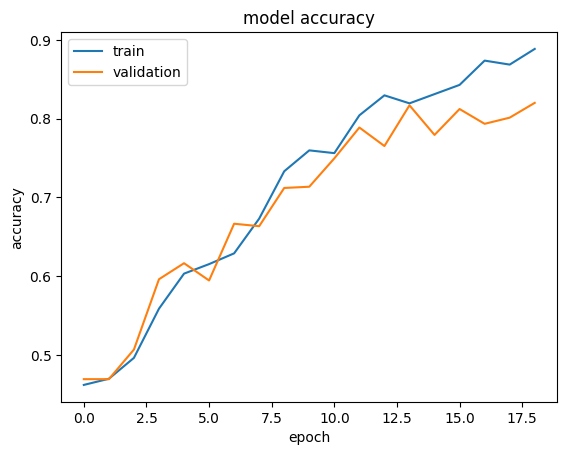

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



 <b><font size="4" color='turquoise'>
Checking Test Accuracy:
</font></b>



In [ ]:
model.evaluate(X_test, (y_test_encoded))

35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.6610 - loss: 176.2161


[184.55926513671875, 0.6654478907585144]

**Observations:**

* The training didn't continue for all of the 60 epochs. The training stopped because the performance wasn't improving beyond a certain point.
* From the above plot, we observe that the training accuracy is continuously improving. However, it was not the case with the validation accuracy. The validation accuracy started fluctuating after 5 epochs.
* All the above observations suggest that the model was overfitting on the training data.
* However, the model was consistent on validation and test data.


 <b><font size="4" color='turquoise'>
Plotting Confusion Matrix:
</font></b>

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step
              precision    recall  f1-score   support

           0       0.68      0.38      0.49       362
           1       0.84      0.74      0.79       500
           2       0.48      0.94      0.64       232

    accuracy                           0.67      1094
   macro avg       0.67      0.69      0.64      1094
weighted avg       0.71      0.67      0.66      1094



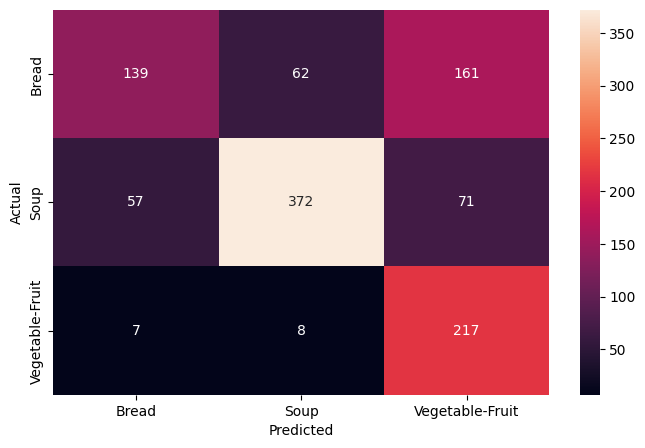

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)
# Printing the classification report
print(classification_report(y_true, pred))
# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Bread', 'Soup', 'Vegetable-Fruit'], yticklabels=['Bread', 'Soup', 'Vegetable-Fruit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()




 <b><font size="4" color='turquoise'>
Observations:
</font></b>

The model shows good improvement in accuracy over the epochs, but it struggles to distinguish between the different classes, especially between (Bread) and (Soup), while it performs better with the (Vegetable-Fruit) category. The model works best for classifying (Soup), but the other categories need improvement. There’s a clear need to adjust the balance between the classes to reduce the misclassification. Overall, the performance is promising but could benefit from adjustments like balancing the data or experimenting with other optimizers to improve class distinction.



---





 <b><font size="6" color='gold'>
Experimenting with Different Learning Rates, Optimizers, or Activation Functions ,,
</font></b>



 <b><font size="5" color='violet'>
Applying SGD Optimizer with Learning Rate 0.001 and Tanh Activation
</font></b>



Found 2564 images belonging to 3 classes.
Found 639 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.4612 - loss: 1.0609
Epoch 1: val_accuracy improved from -inf to 0.51330, saving model to best_model.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 224ms/step - accuracy: 0.4612 - loss: 1.0607 - val_accuracy: 0.5133 - val_loss: 1.0075
Epoch 2/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.5013 - loss: 0.9959
Epoch 2: val_accuracy improved from 0.51330 to 0.51800, saving model to best_model.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 183ms/step - accuracy: 0.5016 - loss: 0.9955 - val_accuracy: 0.5180 - val_loss: 0.9433
Epoch 3/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.5985 - loss: 0.8402
Epoch 3: val_accuracy did not improve from 0.51800
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 181ms/step - accuracy: 0.5983 - loss: 0.8402 - val_accuracy: 0.4961 - val_loss: 1.0223
Epoch 4/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.6016 - loss: 0.8510
Epoch 4: val_accuracy improved from 0.51800 to 0.62754, saving model to best_model.kera

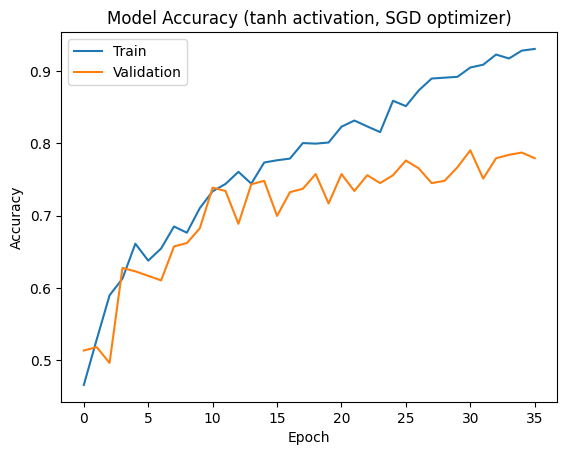

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6298 - loss: 1.5052
Evaluation result: Loss = 1.4297033548355103, Accuracy = 0.6581352949142456
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
              precision    recall  f1-score   support

           0       0.60      0.35      0.44       362
           1       0.67      0.80      0.73       500
           2       0.67      0.84      0.74       232

    accuracy                           0.66      1094
   macro avg       0.65      0.66      0.64      1094
weighted avg       0.65      0.66      0.64      1094



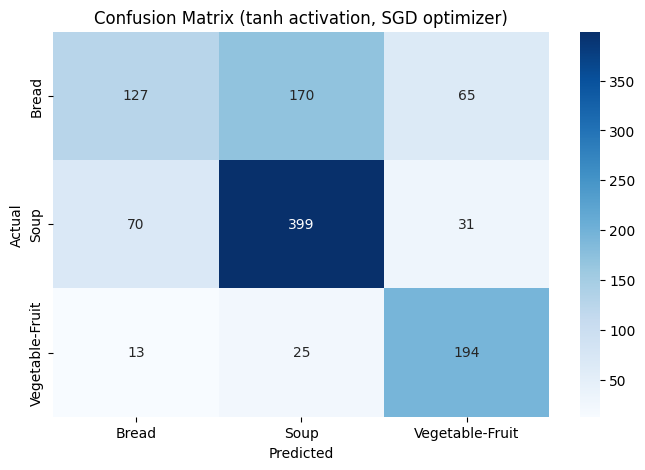

In [ ]:
# Step 1: Set up ImageDataGenerator to load and preprocess the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
# Step 2: Define train_generator and validation_generator
train_generator = train_datagen.flow_from_directory(
    '/content/Food_Data/Training',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    '/content/Food_Data/Training',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
# Step 3: Define the model with Conv2D and Fully Connected Layers using tanh activation
model = Sequential()
# First Conv2D block
model.add(Conv2D(256, (5, 5), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Second Conv2D block
model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Third Conv2D block
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flattening layer
model.add(Flatten())
# Fully connected layers using tanh activation
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
# Output layer with softmax for multi-class classification
model.add(Dense(3, activation='softmax'))
# Step 4: Compile the model using SGD optimizer and a learning rate of 0.001
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Step 5: Set up EarlyStopping and ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Step 6: Train the model
history = model.fit(
    train_generator,
    epochs=60,
    validation_data=validation_generator,
    callbacks=[es, mc]
)
# Step 7: Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (tanh activation, SGD optimizer)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Step 8: Evaluate the model on test data (Assuming X_test and y_test_encoded are defined)
val_loss, val_acc = model.evaluate(X_test, y_test_encoded)
print(f"Evaluation result: Loss = {val_loss}, Accuracy = {val_acc}")
# Step 9: Make predictions and create the confusion matrix
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)
# Printing the classification report
print(classification_report(y_true, pred))
# Step 10: Plotting the confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=['Bread', 'Soup', 'Vegetable-Fruit'], yticklabels=['Bread', 'Soup', 'Vegetable-Fruit'])
plt.title('Confusion Matrix (tanh activation, SGD optimizer)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

 <b><font size="4" color='turquoise'>
Observations:
</font></b>

The model showing some improvement but still relatively low.
Soup class performed best with high precision and recall.
Bread class struggled the most, with very low precision and recall, indicating significant misclassifications.
Vegetable-Fruit did reasonably well but often misclassified as Soup.





 <b><font size="5" color='violet'>
Adding Additional Conv2D Layers and Increasing Neurons in Dense Layers
</font></b>

Found 2564 images belonging to 3 classes.
Found 639 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.3973 - loss: 1.0870
Epoch 1: val_accuracy improved from -inf to 0.46948, saving model to best_model.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 247ms/step - accuracy: 0.3977 - loss: 1.0869 - val_accuracy: 0.4695 - val_loss: 1.0654
Epoch 2/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.4654 - loss: 1.0612
Epoch 2: val_accuracy did not improve from 0.46948
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 184ms/step - accuracy: 0.4655 - loss: 1.0611 - val_accuracy: 0.4695 - val_loss: 1.0564
Epoch 3/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.4632 - loss: 1.0493
Epoch 3: val_accuracy did not improve from 0.46948
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 183ms/step - accuracy: 0.4632 - loss: 1.0493 - val_accuracy: 0.4695 - val_loss: 1.0505
Epoch 4/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.4720 - loss: 1.0431
Epoch 4: val_accuracy did not improve from 0.46948
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 185ms/step - accuracy: 0.4720 - loss: 1.042

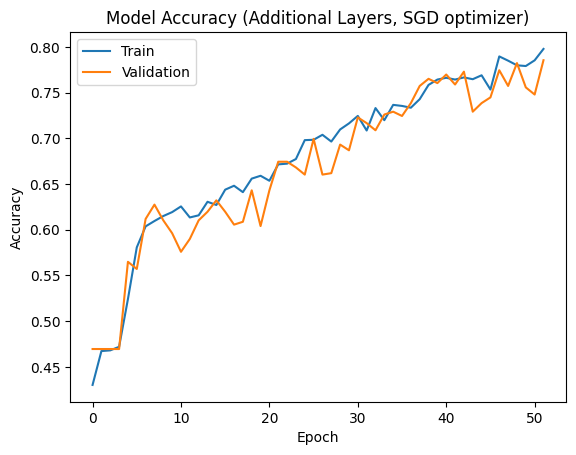

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5348 - loss: 1.8350
Evaluation result: Loss = 1.7594455480575562, Accuracy = 0.5521023869514465
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       362
           1       0.71      0.76      0.73       500
           2       0.40      0.96      0.57       232

    accuracy                           0.55      1094
   macro avg       0.37      0.57      0.43      1094
weighted avg       0.41      0.55      0.46      1094



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


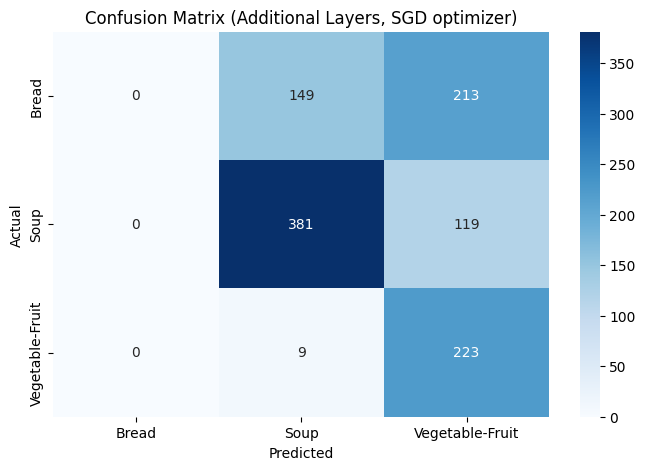

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Rescale pixel values
    validation_split=0.2     # Split 20% for validation
)
# Step 2: Define train_generator and validation_generator
train_generator = train_datagen.flow_from_directory(
    '/content/Food_Data/Training',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    '/content/Food_Data/Training',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
# Step 3: Define the model with additional Conv2D and Fully Connected Layers
model = Sequential()
# First Conv2D block
model.add(Conv2D(256, (5, 5), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Second Conv2D block
model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Third Conv2D block
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# **Added Fourth Conv2D block**
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# **Added Fifth Conv2D block**
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flattening layer
model.add(Flatten())
# Fully connected layers with more neurons
model.add(Dense(128, activation='tanh'))
model.add(Dense(64, activation='tanh'))
# Output layer with softmax for multi-class classification
model.add(Dense(3, activation='softmax'))
# Step 4: Compile the model using SGD optimizer and a learning rate of 0.001
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Step 5: Set up EarlyStopping and ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Step 6: Train the model
history = model.fit(
    train_generator,
    epochs=60,
    validation_data=validation_generator,
    callbacks=[es, mc]
)
# Step 7: Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Additional Layers, SGD optimizer)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Step 8: Evaluate the model on test data (Assuming X_test and y_test_encoded are defined)
val_loss, val_acc = model.evaluate(X_test, y_test_encoded)
print(f"Evaluation result: Loss = {val_loss}, Accuracy = {val_acc}")
# Step 9: Make predictions and create the confusion matrix
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)
# Printing the classification report
print(classification_report(y_true, pred))
# Step 10: Plotting the confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=['Bread', 'Soup', 'Vegetable-Fruit'], yticklabels=['Bread', 'Soup', 'Vegetable-Fruit'])
plt.title('Confusion Matrix (Additional Layers, SGD optimizer)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

 <b><font size="4" color='turquoise'>
Observations:
</font></b>

The model still needs improvement.
The (Bread) class is the hardest to classify, with significant misclassification.
The (Soup) class performed relatively better, with decent accuracy in classification.
The (Vegetable-Fruit) class has good recall but suffers from lower precision in classification.





 <b><font size="5" color='violet'>
Implementing VGG16 with Custom Dense Layers for Food Classification
</font></b>

Found 2564 images belonging to 3 classes.
Found 639 images belonging to 3 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.6057 - loss: 1.0243
Epoch 1: val_accuracy improved from -inf to 0.84664, saving model to best_model_vgg16.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 47s 441ms/step - accuracy: 0.6067 - loss: 1.0213 - val_accuracy: 0.8466 - val_loss: 0.3858 - learning_rate: 0.0010
Epoch 2/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.8183 - loss: 0.4510
Epoch 2: val_accuracy improved from 0.84664 to 0.86385, saving model to best_model_vgg16.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 24s 278ms/step - accuracy: 0.8184 - loss: 0.4510 - val_accuracy: 0.8638 - val_loss: 0.3521 - learning_rate: 0.0010
Epoch 3/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.8509 - loss: 0.4071
Epoch 3: val_accuracy improved from 0.86385 to 0.87793, saving model to best_model_vgg16.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 24s 278ms/step - accuracy: 0.8508 - loss: 0.4070 - val_accuracy: 0.8779 - val_loss: 0.3195 - learning_rate: 0.0010
Epoch 4/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 222m

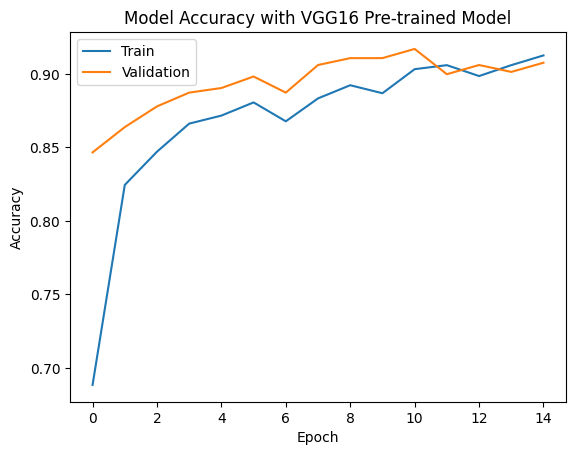

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - accuracy: 0.8215 - loss: 21.8697
Evaluation result: Loss = 20.363142013549805, Accuracy = 0.8299817442893982
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step
              precision    recall  f1-score   support

           0       0.97      0.58      0.73       362
           1       0.92      0.94      0.93       500
           2       0.62      0.99      0.76       232

    accuracy                           0.83      1094
   macro avg       0.84      0.84      0.81      1094
weighted avg       0.87      0.83      0.83      1094



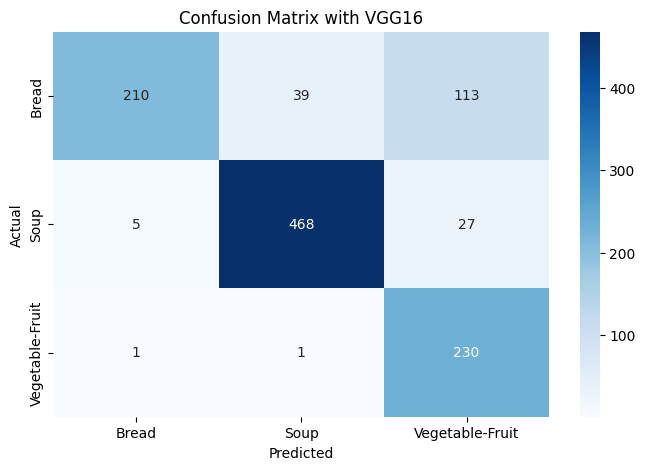

In [ ]:
# Step 1: Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
train_generator = train_datagen.flow_from_directory(
    '/content/Food_Data/Training',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    '/content/Food_Data/Training',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
# Step 2: Load the VGG16 model with pretrained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
# Freeze the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False
# Step 3: Add custom layers on top of the VGG16 base
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)
# Combine the VGG16 base with custom layers
model = Model(inputs=base_model.input, outputs=predictions)
# Step 4: Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Step 5: Set up callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model_vgg16.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
# Step 6: Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[es, mc, lr_reduction]
)
# Step 7: Plot the training and validation accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy with VGG16 Pre-trained Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Step 8: Evaluate the model on test data (Assuming X_test and y_test_encoded are defined)
val_loss, val_acc = model.evaluate(X_test, y_test_encoded)
print(f"Evaluation result: Loss = {val_loss}, Accuracy = {val_acc}")
# Step 9: Make predictions and create the confusion matrix
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)
# Printing the classification report
print(classification_report(y_true, pred))
# Step 10: Plotting the confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=['Bread', 'Soup', 'Vegetable-Fruit'], yticklabels=['Bread', 'Soup', 'Vegetable-Fruit'])
plt.title('Confusion Matrix with VGG16')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

 <b><font size="4" color='turquoise'>
Observations:
</font></b>

Overall Accuracy: The model achieved high accuracy, showing significant improvement compared to previous results, which highlights the benefits of using the pre-trained VGG16 model.

Performance on (Bread) Class: The (Bread) class had moderate performance, with a relatively low recall of 0.58, meaning the model missed several samples from this class.

Performance on (Soup) Class: The model performed excellently on the (Soup) class, achieving precision of 0.90 and recall of 0.95, indicating highly accurate classification.

Performance on (Vegetable-Fruit) Class: The (Vegetable-Fruit) class showed high recall of 0.99, meaning most samples were correctly classified, though the lower precision suggests some misclassifications into this category.



---

